In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import apachelog

In [6]:
sample_string = '113.5.2.10 - - [25/Apr/2016:06:26:13 +0800] "POST /KaQuService/2.3/user/checkIn.json HTTP/1.1" 200 139 "-" "Mozilla/5.0 (X11; U; Linux i686; zh-CN; rv:1.9.2.15) Gecko/20110303 Ubuntu/10.10 (maverick) Firefox/3.6.15"'
nformat = r'%h %l %u %t \"%r\" %>s %b \"%i\" \"%{User-Agent}i\"'
p = apachelog.parser(nformat)
data = p.parse(sample_string)
data

{'%>s': '200',
 '%b': '139',
 '%h': '113.5.2.10',
 '%i': '-',
 '%l': '-',
 '%r': 'POST /KaQuService/2.3/user/checkIn.json HTTP/1.1',
 '%t': '[25/Apr/2016:06:26:13 +0800]',
 '%u': '-',
 '%{User-Agent}i': 'Mozilla/5.0 (X11; U; Linux i686; zh-CN; rv:1.9.2.15) Gecko/20110303 Ubuntu/10.10 (maverick) Firefox/3.6.15'}

In [8]:
from apachelog import ApacheLogParserError
log_list = []
with open('./access.log.3') as f:
    for line in f.readlines():
        try:
            data = p.parse(line)
        except ApacheLogParserError:
            sys.stderr.write("Unable to parse %s" % line)
        data['%t'] = data['%t'][1:12]+' '+data['%t'][13:21]+' '+data['%t'][22:27]
        log_list.append(data)
df = pd.DataFrame(log_list)
df.head()

,%>s,%b,%h,%i,%l,%r,%t,%u,%{User-Agent}i
0,200,12242,211.161.248.233,http://thirdparty.cardqu.com/rip/yishi.php?wei...,-,GET /rip/jquery/jquery.form.js HTTP/1.1,24/Apr/2016 22:54:38 +0800,-,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like ...
1,200,2051,211.161.248.233,http://thirdparty.cardqu.com/rip/yishi.php?wei...,-,GET /rip/img/meishi_03.png HTTP/1.1,24/Apr/2016 22:54:38 +0800,-,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like ...
2,200,33492,211.161.248.233,http://thirdparty.cardqu.com/rip/yishi.php?wei...,-,GET /rip/jquery/jquery-1.8.3.min.js HTTP/1.1,24/Apr/2016 22:54:38 +0800,-,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like ...
3,200,29726,211.161.248.233,http://thirdparty.cardqu.com/rip/yishi.php?wei...,-,GET /rip/img/0-06_06.png HTTP/1.1,24/Apr/2016 22:54:38 +0800,-,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like ...
4,200,90037,211.161.248.233,http://thirdparty.cardqu.com/rip/yishi.php?wei...,-,GET /rip/img/yidali_title.jpg HTTP/1.1,24/Apr/2016 22:54:38 +0800,-,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_1 like ...


In [9]:
df.shape

(9615, 9)

In [10]:
del df['%h']
del df['%i']
del df['%l']
del df['%u']
del df['%{User-Agent}i']
df[0:2]

,%>s,%b,%r,%t
0,200,12242,GET /rip/jquery/jquery.form.js HTTP/1.1,24/Apr/2016 22:54:38 +0800
1,200,2051,GET /rip/img/meishi_03.png HTTP/1.1,24/Apr/2016 22:54:38 +0800


In [12]:
df.rename(columns={"%>s":"Status", "%b":"b", "%r":"Request", "%t":"Time"}, inplace=True)
df.head()

,Status,b,Request,Time
0,200,12242,GET /rip/jquery/jquery.form.js HTTP/1.1,24/Apr/2016 22:54:38 +0800
1,200,2051,GET /rip/img/meishi_03.png HTTP/1.1,24/Apr/2016 22:54:38 +0800
2,200,33492,GET /rip/jquery/jquery-1.8.3.min.js HTTP/1.1,24/Apr/2016 22:54:38 +0800
3,200,29726,GET /rip/img/0-06_06.png HTTP/1.1,24/Apr/2016 22:54:38 +0800
4,200,90037,GET /rip/img/yidali_title.jpg HTTP/1.1,24/Apr/2016 22:54:38 +0800


In [13]:
df.index = pd.to_datetime(df.pop("Time"))
df.head()

,Status,b,Request
Time,,,
2016-04-24 14:54:38,200,12242,GET /rip/jquery/jquery.form.js HTTP/1.1
2016-04-24 14:54:38,200,2051,GET /rip/img/meishi_03.png HTTP/1.1
2016-04-24 14:54:38,200,33492,GET /rip/jquery/jquery-1.8.3.min.js HTTP/1.1
2016-04-24 14:54:38,200,29726,GET /rip/img/0-06_06.png HTTP/1.1
2016-04-24 14:54:38,200,90037,GET /rip/img/yidali_title.jpg HTTP/1.1


In [14]:
def col_b2M(row):
    if row == '-':
        row = pd.nan
    else:
        row = float(row)/1048576  #转为M
    return row
df["b"] = df["b"].apply(col_b2M)
df.head()

,Status,b,Request
Time,,,
2016-04-24 14:54:38,200,0.011675,GET /rip/jquery/jquery.form.js HTTP/1.1
2016-04-24 14:54:38,200,0.001956,GET /rip/img/meishi_03.png HTTP/1.1
2016-04-24 14:54:38,200,0.031940,GET /rip/jquery/jquery-1.8.3.min.js HTTP/1.1
2016-04-24 14:54:38,200,0.028349,GET /rip/img/0-06_06.png HTTP/1.1
2016-04-24 14:54:38,200,0.085866,GET /rip/img/yidali_title.jpg HTTP/1.1


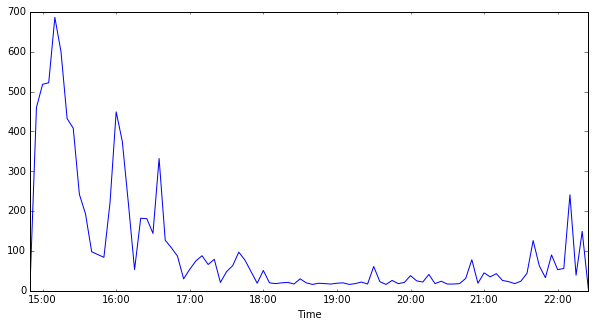

In [18]:
#统计访问数
fig = plt.figure(figsize=(10,5))
df_s = df["Status"].resample('5t').count()  #5分钟
df_s.plot()

In [19]:
df["Status"].value_counts()

200    7208
304    1155
404     685
302     388
206     119
499      23
403      22
400       8
301       7
Name: Status, dtype: int64

In [21]:
df["Request"].value_counts().head(20)

HEAD / HTTP/1.1                                   1089
POST /KaQuThirdParty/wechat/sign.json HTTP/1.1     593
HEAD /favicon.ico HTTP/1.0                         450
POST /KaQuService/2.3/user/login.json HTTP/1.1     358
GET /rip/img/yidali_title.jpg HTTP/1.1             214
GET /rip/img/meishi_05.png HTTP/1.1                208
GET /rip/img/meishi_03.png HTTP/1.1                208
GET /rip/img/share.png HTTP/1.1                    207
GET /rip/img/page5_02.png HTTP/1.1                 207
GET /rip/css/style.css HTTP/1.1                    202
GET /rip/css/animate.min.css HTTP/1.1              199
GET /rip/img/0-06_yidali.png HTTP/1.1              199
GET /rip/img/0-06_06.png HTTP/1.1                  198
GET /rip/jquery/jquery.form.js HTTP/1.1            192
GET /rip/jquery/jquery-1.8.3.min.js HTTP/1.1       185
GET /rip/jquery/rip_yishi.js HTTP/1.1              184
GET /rip/img/page6_05.png HTTP/1.1                 180
GET /rip/img/page6_10.png HTTP/1.1                 180
GET /rip/i

In [22]:
df["b"].sum()

101.8823709487915

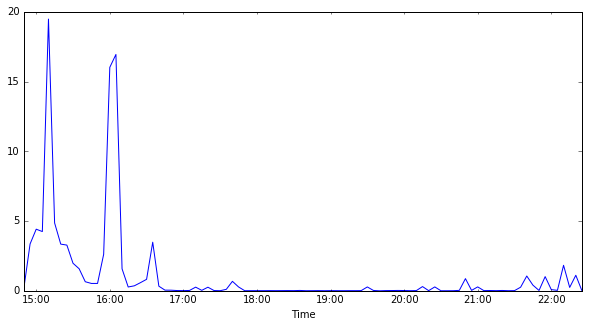

In [29]:
#统计流量
fig = plt.figure(figsize=(10,5))
df_traffic = df["b"].resample('5t').sum()
df_traffic.plot()